In [135]:
#https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial
#https://www-m9.ma.tum.de/graph-algorithms/directed-chinese-postman/index_en.html

import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import imageio
import os

In [136]:
def plot_graph(g,title,save=False,img_num=0,**kwargs):
    if kwargs:
        path_list=kwargs.get('path_list')
        edge_list=kwargs.get('edge_list')
        path_cost=kwargs.get('path_cost')
        source=kwargs.get('source')
        dest=kwargs.get('destination')
        path_list_minus_ends = path_list
        path_list_minus_ends.remove(source)
        path_list_minus_ends.remove(dest)
    else:
        path_list=[]
        edge_list=[]
        path_list_minus_ends=[]
        source=""
        dest=""
    color_map = [] 
    color_map_edges=[]
    for node in g:
        if node in path_list_minus_ends:
            color_map.append('yellow')
        elif node == source:
            color_map.append('blue')
        elif node == dest:
            color_map.append('green')
        else:
            color_map.append('grey')
    for edge in g.edges():
        if edge in edge_list:
            color_map_edges.append('red')
        else:
            color_map_edges.append('black')
    plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    pos=nx.get_node_attributes(g,'pos')
    node_labels=nx.get_node_attributes(g,'id')
    nx.draw(g,pos,node_color=color_map,edge_color=color_map_edges,node_size=500)
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_labels(g,pos,labels=node_labels)
    updated_labels={}
    for item in labels:
        updated_labels[item[:2]]=labels[item]
    nx.draw_networkx_edge_labels(g,pos,edge_labels=updated_labels,connectionstyle='arc3,rad=-100',rotate=True)
    plt.title(title)
    if save:
        plt.savefig('img/image{}'.format(img_num))
    else:
        plt.show()

def add_edges(g,edges,weight,name):
    if name in list(nx.get_edge_attributes(g,'name').values()):
        edge_weight_data=nx.get_edge_attributes(g,'weight')
        this_edge_weight_list=edge_weight_data[edges]
        this_edge_weight_list.append(weight)
        g.add_edge(edges[0],edges[1],name=name,weight=this_edge_weight_list)
    else:
        g.add_edge(edges[0],edges[1],name=name,weight=[weight])

def make_circuit_video(image_path, movie_filename, fps=5):
    # sorting filenames in order
    filenames = glob.glob(image_path + 'image*.png')
    filenames_sort_indices = np.argsort([int(os.path.basename(filename).split('.')[0][5:]) for filename in filenames])
    filenames = [filenames[i] for i in filenames_sort_indices]

    # make movie
    with imageio.get_writer(movie_filename, mode='I', fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)


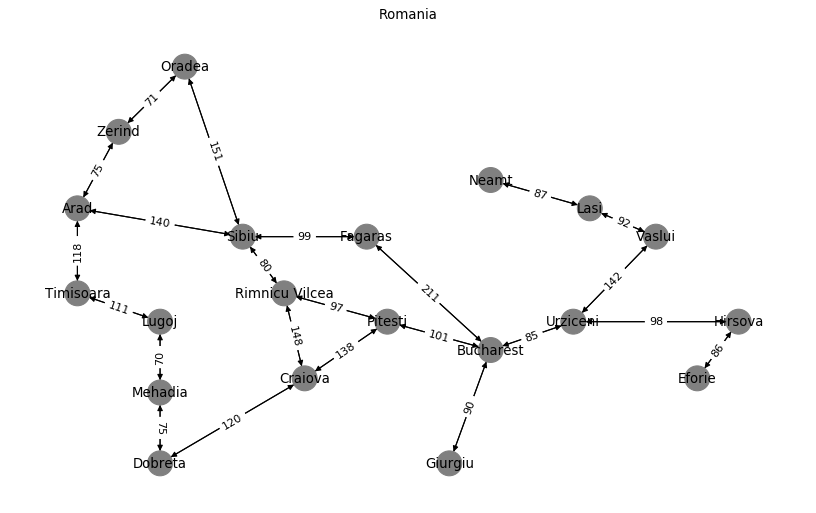

In [112]:
edgelist = pd.read_csv('C:\\Users\\SIDDHARTHA\\Trinity\\AI\\AIDemo\\data\\romanian_edges.csv')
nodelist = pd.read_csv('C:\\Users\\SIDDHARTHA\\Trinity\\AI\\AIDemo\\data\\romania_cities.csv')

#edgelist=pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
#nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

g = nx.MultiDiGraph()

for index,row in nodelist.iterrows():
    g.add_node(row['id'],pos=(row['X'],row['Y']),id=row['id'])


for index,row in edgelist.iterrows():
    #add_edges(g,(row['node1'],row['node2']),row['distance'],row['trail'])
    g.add_edge(row['node1'],row['node2'],name=str(row['trail'])+str(row['distance']),weight=row['distance']) 

plot_graph(g,'Romania',save=True,img_num=1)

In [14]:
#CPP algo start.
from collections import deque
def BFS(g,start,end):
    queue = deque()
    visited = deque()
    current_node = start
    visited.append(start)
    if start not in g.nodes() or end not in g.nodes():
        return "Nodes not present in graph!"
    else:
        while True:
            adj=[edge for edge in g.edges(data=True) if edge[0]==current_node and edge[1] not in visited]
            #print('current node: ',current_node)
            #print('adj: ',adj)
            for edge in adj:
                queue.append(edge[1])
                visited.append(edge[1])
                if end in visited:
                    return visited
            #print('q-',queue)
            #print('v-',visited)
            #print('visited: ',visited)
            #print('q: ',queue)
            #print('------------------------------------------')
            #if all(item in visited for item in g.nodes()):
            #    return visited
            current_node=queue.popleft()
                

print(BFS(g,'a','e'))



Nodes not present in graph!


In [15]:
def djkstra(g,start):
    if start not in g.nodes():
        return str(start)+" is not a valid node"
    LARGE_NUM=999999
    shortest_path_dict={}
    visited=[]
    unvisited=[]
    current_node=start
    step=0
    for node in g.nodes():
        if node != start:
            shortest_path_dict[node]={'weight':LARGE_NUM,'prev':None}
        else:
            shortest_path_dict[node]={'weight':0,'prev':None}
    while True:
            adj=[edge for edge in g.edges(data=True) if edge[0]==current_node and edge[1] not in visited]
            #print(shortest_path_dict)
            dist_from_curr=shortest_path_dict[current_node]['weight']
            for edge in adj:
                adj_node=edge[1]
                weight=edge[2]['weight']
                if dist_from_curr+weight < shortest_path_dict[adj_node]['weight']:
                    shortest_path_dict[adj_node]['weight']=dist_from_curr+weight
                    shortest_path_dict[adj_node]['prev']=current_node
            shortest_path_dict={k: v for k, v in sorted(shortest_path_dict.items(), key=lambda item: item[1]['weight'])}
            visited.append(current_node)
            for item in list(shortest_path_dict.keys()):
                if item not in visited:
                    current_node=item
                    break
            #print(shortest_path_dict)
            #print(visited)
            #print(current_node)
            #print('----')
            if all(elem in visited for elem in g.nodes()):
                return shortest_path_dict

def get_shortest_path(path_data,end):
    #print(path_data)
    shortest_path = []
    if 'not a valid node' in path_data or end not in g.nodes():
        return "Invalid nodes in input!"
    current_node=end
    path=[]
    path.append(end)
    while path_data[current_node]['prev'] is not None:
        path.append(path_data[current_node]['prev'])
        current_node=path_data[current_node]['prev']
    shortest_path=path[::-1]
    shortest_path.append(path_data[end]['weight'])
    return shortest_path



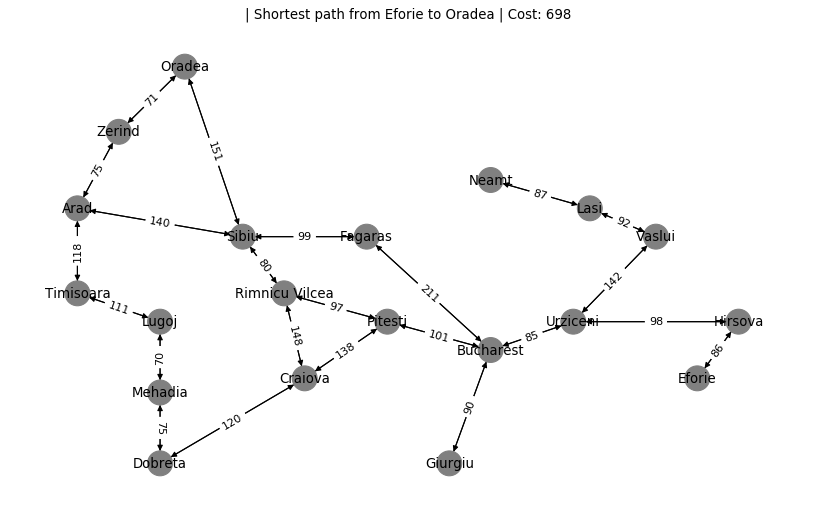

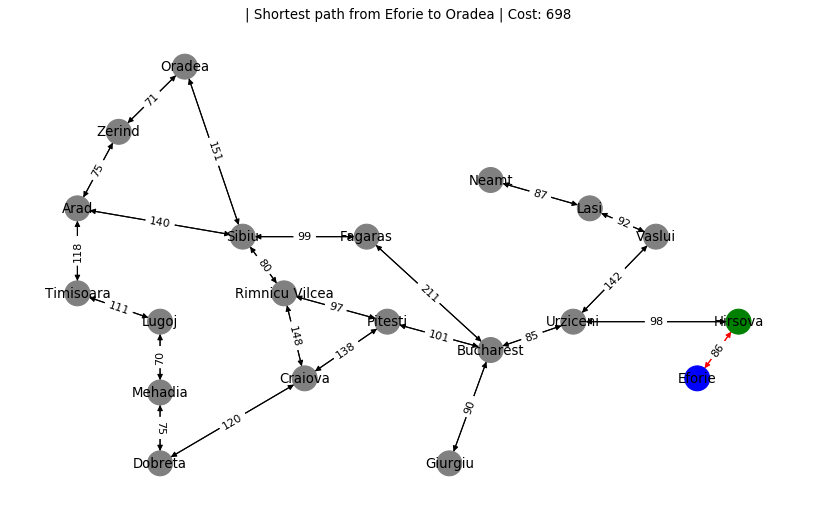

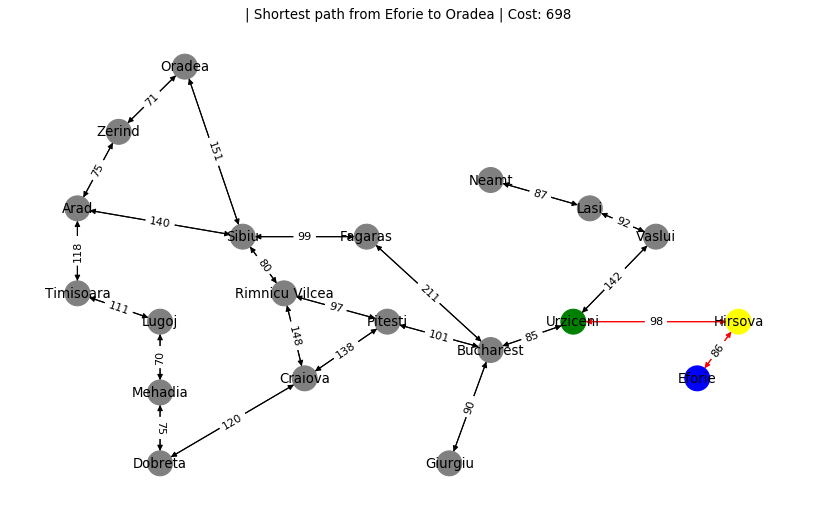

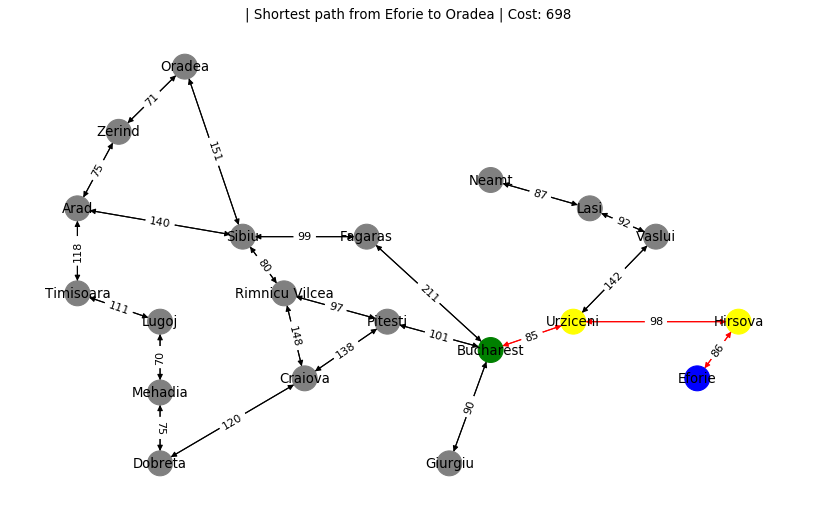

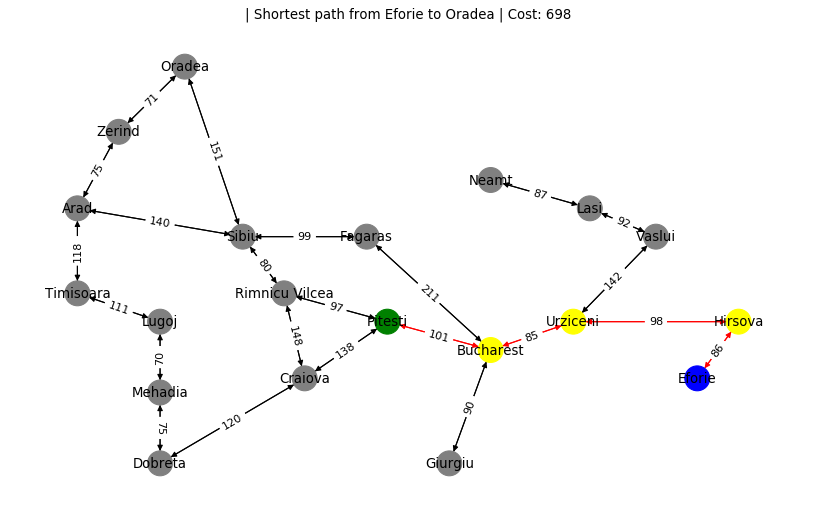

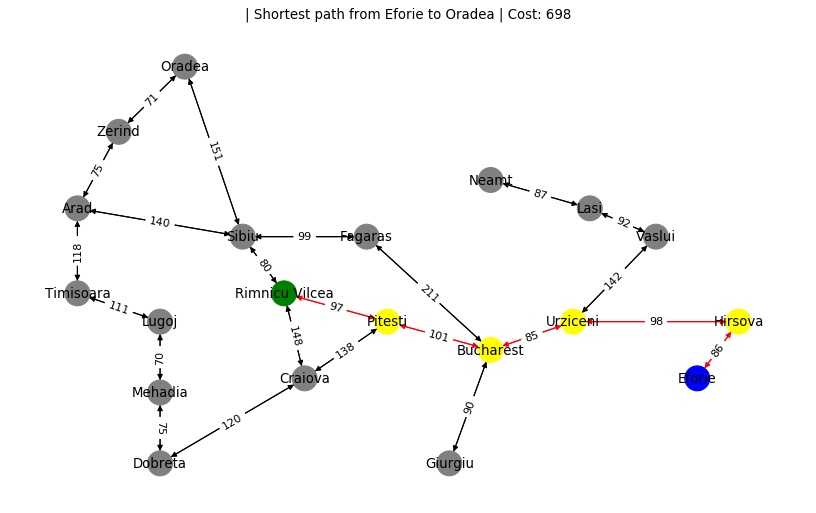

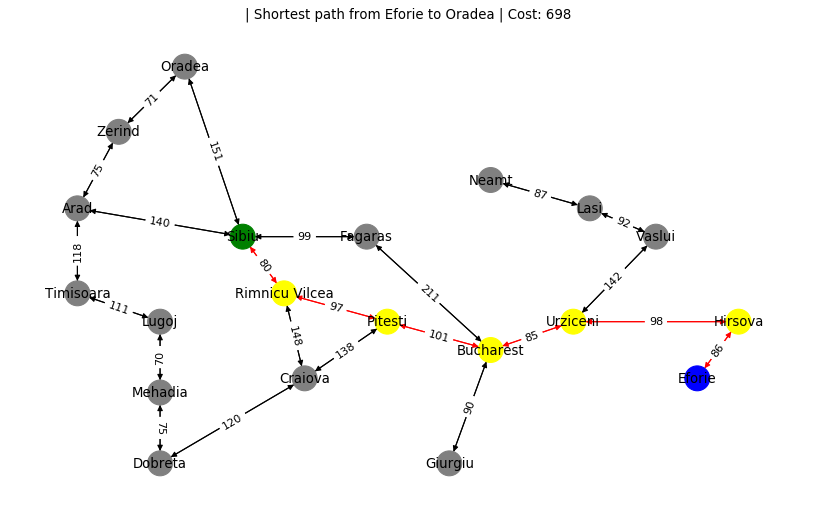

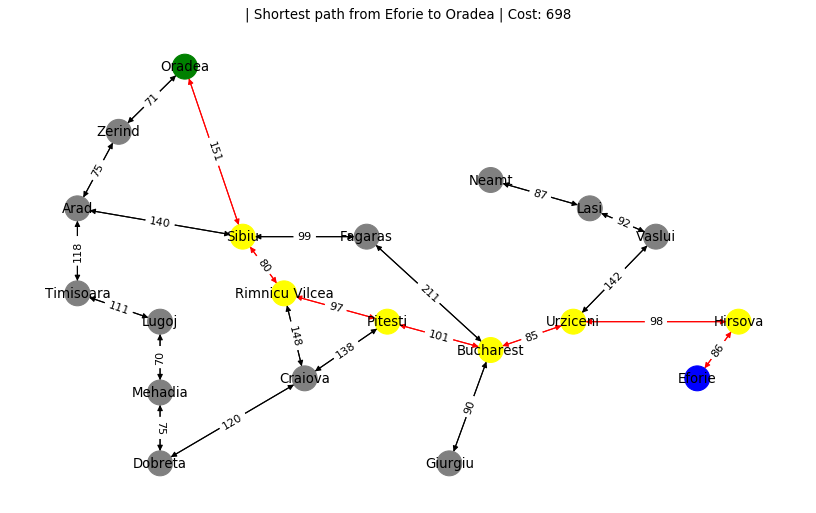

In [137]:
#djkstra(g,'Aachen')
source='Eforie'
dest = 'Oradea'
path_data=get_shortest_path(djkstra(g,source),dest)
path_cost=path_data[len(path_data)-1]
shortest_path=path_data[:len(path_data)-1]

edge_list=[]
for i in range(len(shortest_path)-1):
    edge_list.append((shortest_path[i],shortest_path[i+1]))
    edge_list.append((shortest_path[i+1],shortest_path[i]))

i=2
j=2
plot_graph(g,'| Shortest path from '+str(source) + ' to '+str(dest) +' | Cost: '+str(path_cost),save=True,img_num=0)
while i<=len(shortest_path):
    img_num=i-1
    plot_graph(g,'| Shortest path from '+str(source) + ' to '+str(dest) +' | Cost: '+str(path_cost),save=True,img_num=img_num,path_list=shortest_path[:i],edge_list=edge_list[:j],source=source,destination=shortest_path[:i][len(shortest_path[:i])-1])
    i+=1
    j+=2

make_circuit_video('img/', 'gif/route_animation.gif', fps=1)
